# Classification of Tumors

### Table of contents 

1. [Background](#background)
2. [Libraries and data](#librar)
3. [Pre-processing](#pre)
    1. [Splitting the data](#split)
4. [Supervised learning](#supl)
    1. [Logistic Regression](#logreg)
        1. [Evaluation of the model](#eva1)
    2. [Decision tree](#tree)
        1. [Evaluation of the model](#eva2)
5. [Unsupervised learning](#usupl)
    1. [k-Means Clustering](#clust)
        1. [Evaluation of the model](#eva3)
6. [Deep learning](#deep)
    1. [Neural Networks](#nn)
        1. [Evaluation of the model](#eva4)
7. [Final remarks](#final)

## 1. Background <a id="background"></a>

We use a clean dataset from 1995 about attributes of breast tumors computed from digitized images. The tumors are diagnosed as malignant og benign. I deliberately chose this dataset because it is clean and to be able to use a wide and selected range of machine learning models.<br/>
<br/>
Source: https://data.world/health/breast-cancer-wisconsin

## 2. Libraries and data <a id="librar"></a>

In [28]:
import pandas as pd              #Data structures and data analysis library.
import numpy as np               #Vectors, matrices and linear algebra in general.

import seaborn as sns            #Statistical visualization library.
import matplotlib.pyplot as plt  #Plotting library.
import graphviz                  #Graph vizualisation library.

#Machine learning.
from sklearn.preprocessing import StandardScaler       #Standardize data.
from sklearn.model_selection import train_test_split   #Splitting the data.
from sklearn import linear_model                       #Linear and logistic regression.
from sklearn.metrics import confusion_matrix           #Evaluating machine learning models.
from sklearn import tree                               #Decision tree.
from sklearn.ensemble import RandomForestClassifier    #Random Forests.
from sklearn.cluster import KMeans                     #k-Means clustering.
from sklearn.metrics import jaccard_similarity_score   #Measure for comparing ratio of similar objects.

#Deep Learning.
from keras.models import Sequential                    #Sequential layering.
from keras.layers import Dense                         #Core of a layer.
from ann_visualizer.visualize import ann_viz           #Neural network visualizer.

In [29]:
data = pd.read_csv("breast-cancer-wisconsin-data.csv")
data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
482,912519,B,13.470,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,...,18.32,94.94,660.2,0.1393,0.2499,0.1848,0.1335,0.3227,0.09326,NaN
148,86973702,B,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,...,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.1599,0.2691,0.07683,NaN
44,85638502,M,13.170,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,...,29.89,105.50,740.7,0.1503,0.3904,0.3728,0.1607,0.3693,0.09618,NaN
470,9113778,B,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.0656,0.3174,0.08524,NaN
337,897630,M,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.06090,...,34.37,161.10,1873.0,0.1498,0.4827,0.4634,0.2048,0.3679,0.09870,NaN


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

The data consists of 33 columns. One column, `Unnamed: 32`, seems empty from the sample. Another column, `id` seems to be a unique identifying number for the images of the patients. The column `diagnosis` is our main labeling of the data with `B` for benign or `M` for malignant. The remaining columns are geometrical features of the tumors. Each feature is listed with mean value, maximum value (worst) and standard error.

## 3. Pre-processing <a id="pre"></a>

We drop the columns `id`and `Unnamed: 32` and encode benign diagnosis `B` with the integer 0 and the malign diagnosis `M` with the integer 1.

In [6]:
data.drop(columns=['id', 'Unnamed: 32'], inplace=True)
data.replace(["B","M"],[0,1], inplace=True)

Next, we extract the `diagnosis` data as the labels `Y` and we standardize the rest of the data as `X`.

In [7]:
Y = data['diagnosis']
X = data.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)

In [8]:
#Distribution of the diagnosis.
Y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [9]:
#The first row of data after standardizing.
X[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

### 3A. Splitting the data <a id="split"></a>

To develop the models for classification, we split the data at random into 80% training data and 20% testing data.

In [10]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.20, random_state = 42)

## 4. Supervised learning <a id="supl"></a>

Our dataset is a binary classification problem (benign or malignant) of tumors. First, we create different machine learning models suitable for binary classification. Second, we apply the models to predict the outcome of the training data. Third, we evaluate the models.

### 4A. Logistic Regression <a id="logreg"></a>

We begin by making a logistic regression model. This regression model may be suitable as logistic functions have two horizontal asymptotes where the binary values could cluster.

In [11]:
log_reg = linear_model.LogisticRegression(C=150, random_state=11, solver='lbfgs', max_iter=5000)
log_reg.fit(xTrain, yTrain)

LogisticRegression(C=150, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=11, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
yPred = log_reg.predict(xTest)

#### 4Aa. Evaluation of the model <a id="eva1"></a>

First, we compute the accuracy of our logistic model.

In [13]:
def correctPred(yTest,yPred):
    return sum(yTest == yPred)

def printPred(model_name, yTest, yPred):
    correct = correctPred(yTest,yPred)
    total = len(yTest)
    return "The "+model_name+" correctly predicted "+str(correct)+" out of "+str(total)+" predictions.\nRatio of correct predictions: "+str(correct/total)

In [14]:
print(printPred("logistic model", yTest, yPred))

The logistic model correctly predicted 107 out of 114 predictions.
Ratio of correct predictions: 0.9385964912280702


We examine the predictions using a confusion matrix to identify the false positives and false negatives of this prediction.

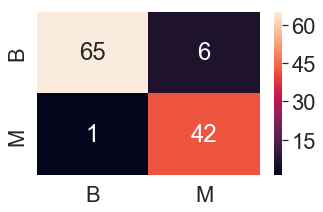

In [15]:
def confusionMatrix(yTest,yPred):
    df_cm = pd.DataFrame(confusion_matrix(yTest, yPred), index = [i for i in "BM"],
                      columns = [i for i in "BM"])
    plt.figure(figsize = (5,3))
    sns.set(font_scale=2)
    sns.heatmap(df_cm, annot=True)
    plt.show()
    
confusionMatrix(yTest,yPred)

In [16]:
yTest[yTest != yPred]

81     0
73     1
281    0
275    0
208    0
228    0
238    0
Name: diagnosis, dtype: int64

The confusion matrix and a comparison of the wrong predictions show that six images with benign tumors were wrongly predicted as malignant, and that one image of a malignant tumor was wrongly predicted as malignant. That is, six false positives and one false negative. In our case of a potential breast cancer, the 1 false negative is an unfortunate prediction.

### 4B. Decision tree  <a id="tree"></a>

Due to the binary nature of our predictions, we create a decision tree based on our training data. After evaluating, we make use of random forests to potentially increase the prediction accuracy. First, we make a tree with two levels to understand the decisions.

In [17]:
tre = tree.DecisionTreeClassifier(max_depth=3)
tre.fit(xTrain, yTrain)
yPred = tre.predict(xTest)

We visualize the first layers of the decision tree.

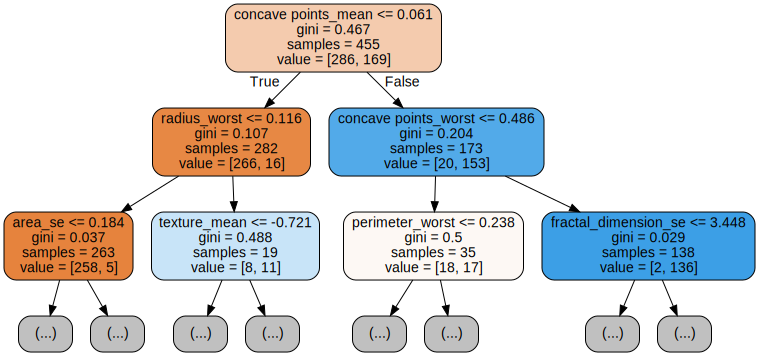

In [18]:
dot_data = tree.export_graphviz(tre, out_file=None, max_depth=2, feature_names=list(data.drop('diagnosis', axis=1).columns.values), filled=True, rounded=True)
desTree = graphviz.Source(dot_data) 
desTree

Note that our decision tree states that we may identify 136 of the 169 malignant tumors using only the attributes with `concavity`. This means that in our sample, it may be more likely that `concavity` is linked to malignant tumors. However, using cross-validation we should pursue this even further.

####  4Ba. Evaluation of the model <a id="eva2"></a>

We compute the accuracy of our model.

In [19]:
print(printPred("decision tree", yTest, yPred))

The decision tree correctly predicted 108 out of 114 predictions.
Ratio of correct predictions: 0.9473684210526315


Comparing only the accuracy, the decision tree is almost as good as the logistic model (they differ by one correct predicition). Let's see the details in the confusion matrix of the prediction is the following.

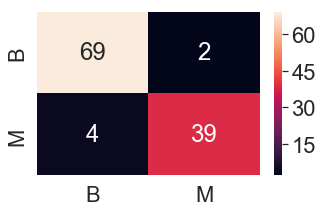

In [20]:
confusionMatrix(yTest,yPred)

Note that there are four false negatives, i.e. four persons with malignant tumor that are wrongly diagnosed with benign tumors. From a medical perspective, this suggests that the decision tree is not preferable over the logistic regression unless we consider more depth, but then we may risk overfitting the model. Another idea here may be to use random forests to get a better prediction.

## 5. Unsupervised learning <a id="usupl"></a>

Since our problem is a classification problem, we may also make use of clustering to uncover relations between our data. 

### 5A. k-Means Clustering <a id="clust"></a>

We  use $k$-means clustering to find clusters within our data. Note that even though we may suspect the $k$ number of clusters are 2, it may exist another optimal number of $k$. First, we find the optimal $k$ for $k$-means clustering. Second, we cluster the data after our model. Third, we evaluate our clustering.

To find the optimal number of clusters, we compute the Sum of Squared Errors (SSE) for some values of $k$, for example $k\in \{1,2,3,..., 11,12\}$. Then we plot the SSE-values relative to the $k$-values and use the elbow method to find the optimal $k$.

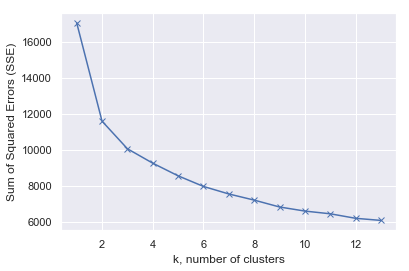

In [21]:
#We compute SSE for each k and plot the results
kValues = []
SSE = []
for k in range(1,14):
    kMean = KMeans(n_clusters=k)
    kMean = kMean.fit(X)
    SSE.append(kMean.inertia_)
    kValues.append(k)

sns.set(font_scale=1)
plt.plot(kValues, SSE, 'bx-')
plt.xlabel('k, number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

We suspect that $k=2$ or $k=3$ is our optimal number of clusters. To be certain, we compare the SSE for these numbers of clusters. Note that the optimal $k$ is the point $(k,SSE(k))$ which has maximum distance to the secant line between the end points.

In [22]:
#y denotes the distance between each plotted point and the secant line.
y = []
end0 = np.array([kValues[0],SSE[0]])
end1 = np.array([kValues[len(SSE)-1],SSE[len(SSE)-1]])
for i in range(1,13):
    point = np.array([kValues[i],SSE[i]])
    distancePointToSecant = np.linalg.norm(np.cross(end1-end0, end0-point))/np.linalg.norm(end1-end0)
    y.append(distancePointToSecant)

print("The optimal k is k="+str(np.array(y).argmax()+1))


The optimal k is k=2


This confirms that our dataset is indeed binary classified and that we should expect two clusters within the dataset. Now, we cluster the data.

In [23]:
kMean = KMeans(n_clusters=2, init="k-means++", n_init=10)
kMeanPredict = kMean.fit_predict(X)
clusterCenters = kMean.cluster_centers_

#### 5Aa.  Evaluation of the model <a id="eva3"></a>

We visualize the clustered data with the clustering centers.

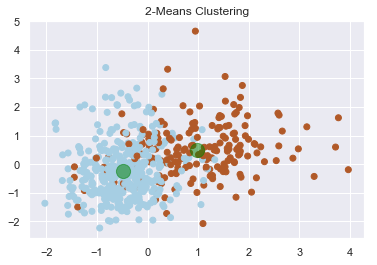

In [24]:
plt.scatter(X[:,0], X[:,1], c=kMeanPredict, cmap=plt.cm.Paired)
plt.title("2-Means Clustering")
plt.scatter(clusterCenters[:, 0], clusterCenters[:, 1], c='green', s=200, alpha=0.5);
plt.show()

Note that we obtain two clusters. We can compare with the true data.

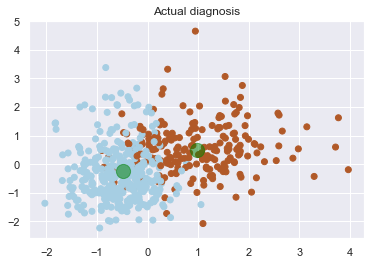

In [25]:
plt.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap=plt.cm.Paired)
plt.title("Actual diagnosis")
plt.scatter(clusterCenters[:, 0], clusterCenters[:, 1], c='green', s=200, alpha=0.5);
plt.show()

Note that our clusters are somewhat convex, so k-means was an intuitive choice. However, if the clusters were not convex, we would have to try another clustering algorithm. Now, we evaluate the clustering using some measures.

In [26]:
j = jaccard_similarity_score(data["diagnosis"], kMeanPredict)
print("Jaccard Index: ",j)

Jaccard Index:  0.9103690685413005


According to the Jaccard index, the clustering is correct in around 90,5% of the cases. We examine the accuracy of the clustering using a confusion matrix.

In [27]:
confusion_matrix(data["diagnosis"], kMeanPredict)

array([[343,  14],
       [ 37, 175]], dtype=int64)

Here, the ratio of false negative is $\frac{37}{343+14+37+175}=\frac{37}{569} \simeq 0,06$. On the other hand, the ratio of false negatives in our logistic regression model was $\frac{1}{114}=\frac{36}{569} \simeq 0,008$. This means that the logistic model is both more accurate and far better at avoiding false negatives.

## 6. Deep Learning <a id="deep"></a>

We make a neural network with linear layering using `keras` to make predictions.

### 6A. Neural Networks <a id="nn"></a>

We define the layering of our neural network as linear and find the number of variables in the input layer.

In [26]:
nn_model = Sequential()
print("Number of variables in input layer:",X[:1].shape[1])

Number of variables in input layer: 30


We make a neural network consisting of 30 variables in the input layer, 2 hidden layer with 16 nodes and 8 nodes, and 1 output node in the final layer.

In [27]:
nn_model.add(Dense(16, input_dim=30, activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

We compile and fit our neural network to our training data.

In [35]:
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(xTrain, yTrain, epochs=150, batch_size=10)

Epoch 1/150
455/455 [==============================] - 1s 2ms/step - loss: 1.6397e-05 - acc: 1.0000
Epoch 2/150
455/455 [==============================] - 0s 485us/step - loss: 1.3222e-05 - acc: 1.0000
Epoch 3/150
455/455 [==============================] - 0s 457us/step - loss: 1.2850e-05 - acc: 1.0000
Epoch 4/150
455/455 [==============================] - 0s 404us/step - loss: 1.0964e-05 - acc: 1.0000
Epoch 5/150
455/455 [==============================] - 0s 361us/step - loss: 8.7234e-05 - acc: 1.0000
Epoch 6/150
455/455 [==============================] - 0s 338us/step - loss: 1.2264e-05 - acc: 1.0000
Epoch 7/150
455/455 [==============================] - 0s 445us/step - loss: 7.6274e-06 - acc: 1.0000
Epoch 8/150
455/455 [==============================] - 0s 485us/step - loss: 6.1710e-06 - acc: 1.0000
Epoch 9/150
455/455 [==============================] - 0s 399us/step - loss: 5.4133e-06 - acc: 1.0000
Epoch 10/150
455/455 [==============================] - 0s 358us/step - loss: 5.1863

We visualize our neural network model using `ann_viz` which generates a pdf-file with the visualization.

In [29]:
ann_viz(nn_model, title="Sequential Neural Network")

A screenshot of the visualization is the following:

<img src="https://i.imgur.com/HZysPr3.png">

#### 6Aa. Evaluation of the model <a id="eva4"></a>

We test the neural network for accuracy.

In [45]:
scores = nn_model.evaluate(xTest, yTest)
print(nn_model.metrics_names[1], scores[1]*100)

114/114 [==============================] - 0s 140us/step
acc 99.12280701754386


The neural network predicts with an accuracy of 99,12%.

## 7. Final remarks <a id="final"></a>

We have used supervised and unsupervised learning for a binary classification of tumors. The most accurate model was the sequential neural network. Trailing behind in accuracy, the logistic regression had a low rate of false negatives. Of course, there are several other binary classification models we could apply to our dataset.